In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
bike_data_raw = pd.read_csv('daily-bike-share.csv')
bike_data_raw['dteday'] = pd.to_datetime(bike_data_raw['dteday'])
display(bike_data_raw)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


/var/folders/qs/rq5n_22j7s9gctbn9f0bxfgr0000gn/T/ipykernel_13776/640055545.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='rentals', ylabel='Density'>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  rentals     731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 80.1 KB


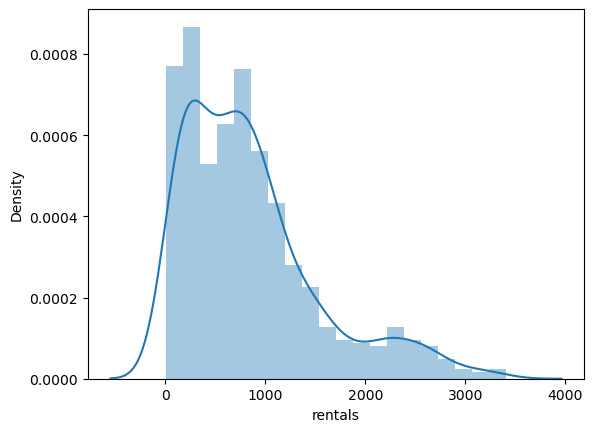

In [58]:
display(sns.distplot(bike_data_raw['rentals']))
bike_data_raw.info()


In [59]:
bike_data_raw['rentals'].describe()


count     731.000000
mean      848.176471
std       686.622488
min         2.000000
25%       315.500000
50%       713.000000
75%      1096.000000
max      3410.000000
Name: rentals, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

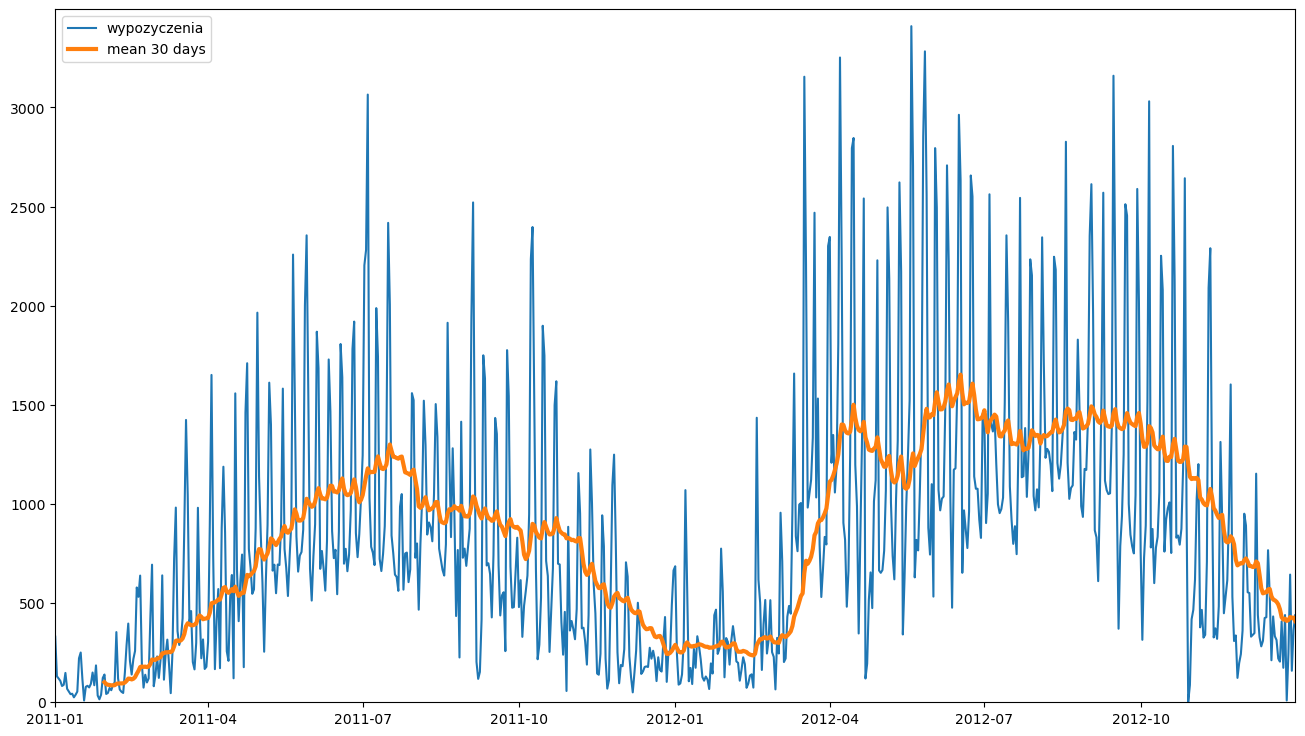

In [60]:
plt.figure(figsize=(16, 9))
plt.plot(bike_data_raw['dteday'], bike_data_raw['rentals'], label='wypozyczenia')
plt.plot(bike_data_raw['dteday'], bike_data_raw['rentals'].rolling(30).mean(), linewidth=3, label='mean 30 days')
plt.xlim([bike_data_raw['dteday'].min(), bike_data_raw['dteday'].max()])
plt.ylim([0, bike_data_raw['rentals'].max()*1.025])
plt.legend(loc='upper left')
plt.show

Przygotowanie danych do dalsszej pracy

In [61]:
bike_data = bike_data_raw.copy()
bike_data.drop(['instant', 'dteday', 'yr'], axis=1, inplace=True)
display(bike_data)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


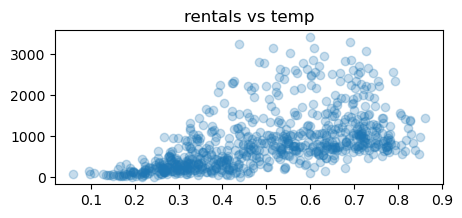

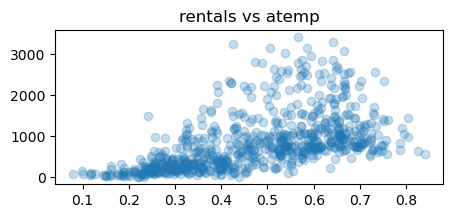

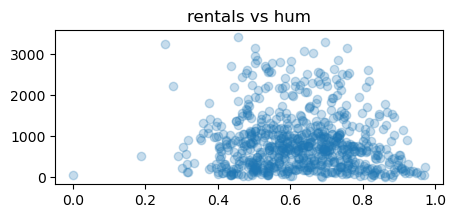

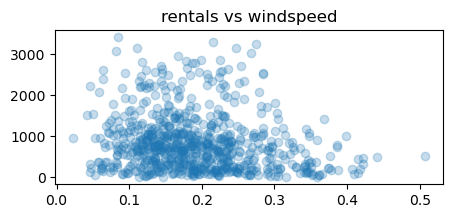

In [62]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit']
target = 'rentals'

for num_feat in numeric_features:
    fig = plt.figure(figsize=(5, 2))
    plt.scatter(bike_data[num_feat], bike_data[target], alpha=0.25)
    #plt.xlabel(num_feat)
    #plt.ylabel('Bike Rentals') #dlaczego tu nie działa?
    plt.title(f'rentals vs {num_feat}')
    plt.show()


/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



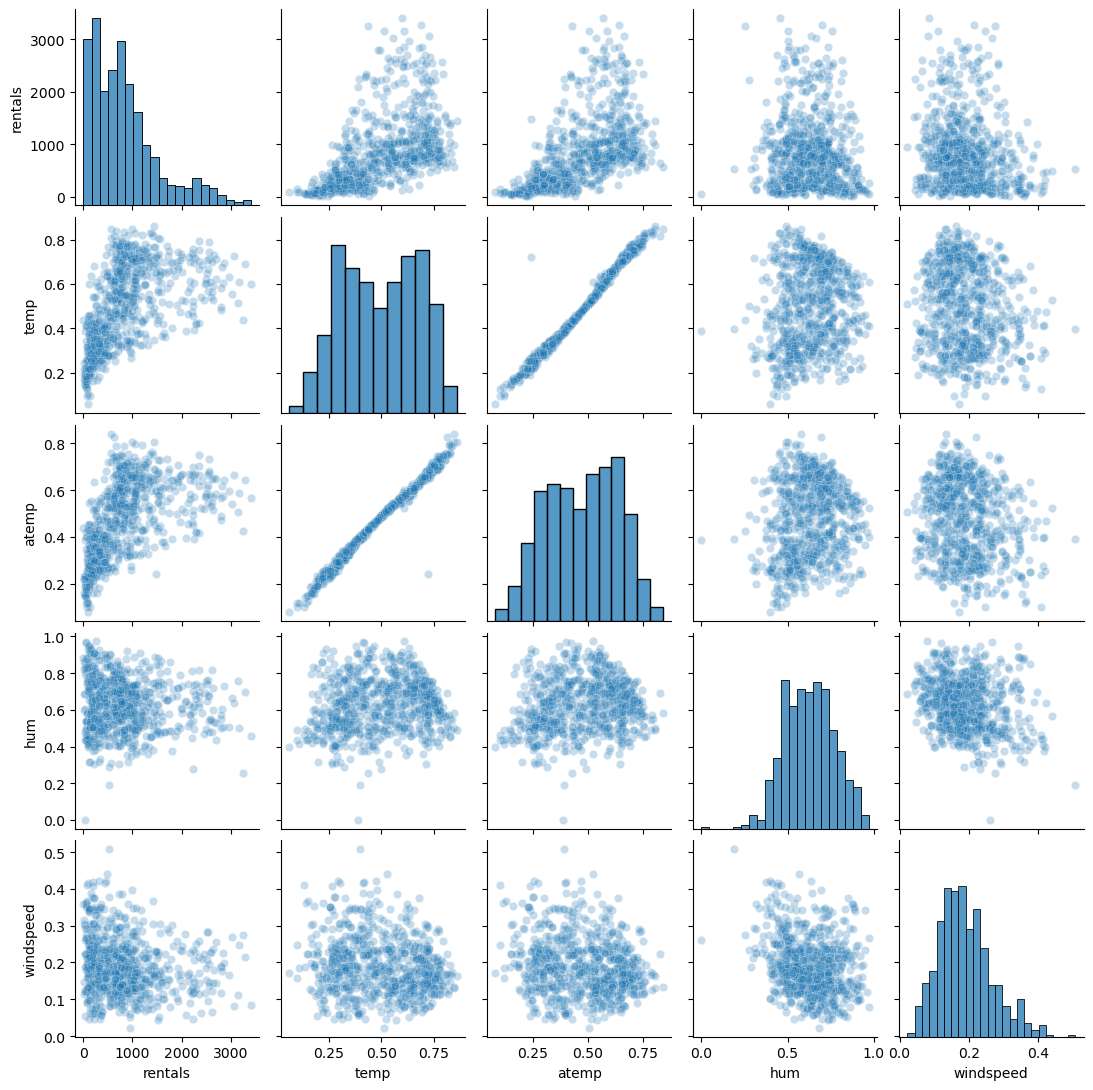

In [63]:
fig = sns.pairplot(bike_data[[target]+numeric_features], kind='scatter', plot_kws={'alpha': 0.25})
fig.fig.set_size_inches(11, 11) #ustawiamy rozmiar wykresu
plt.show()

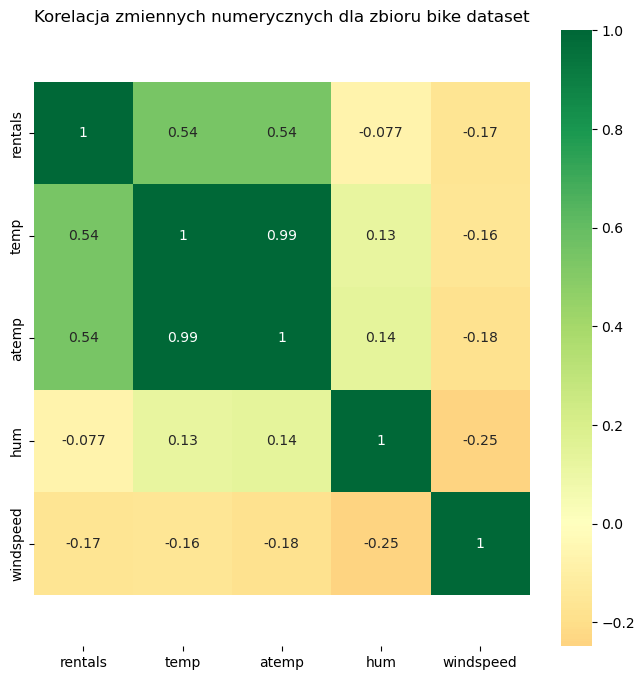

In [64]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(bike_data[[target]+numeric_features].corr(),
                 xticklabels=bike_data[[target]+numeric_features].corr().columns,
                 yticklabels=bike_data[[target]+numeric_features].corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja zmiennych numerycznych dla zbioru bike dataset', fontsize=12)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [65]:
bike_data['difference_temp'] = (bike_data['atemp'] - bike_data['temp'])/bike_data['temp']
bike_data.drop(['atemp'], axis=1, inplace=True)
numeric_features = ['temp', 'difference_temp', 'hum', 'windspeed']
bike_data[['rentals', 'temp', 'difference_temp']].corr()

,rentals,temp,difference_temp
rentals,1.000000,0.543285,-0.310423
temp,0.543285,1.000000,-0.599254
difference_temp,-0.310423,-0.599254,1.000000


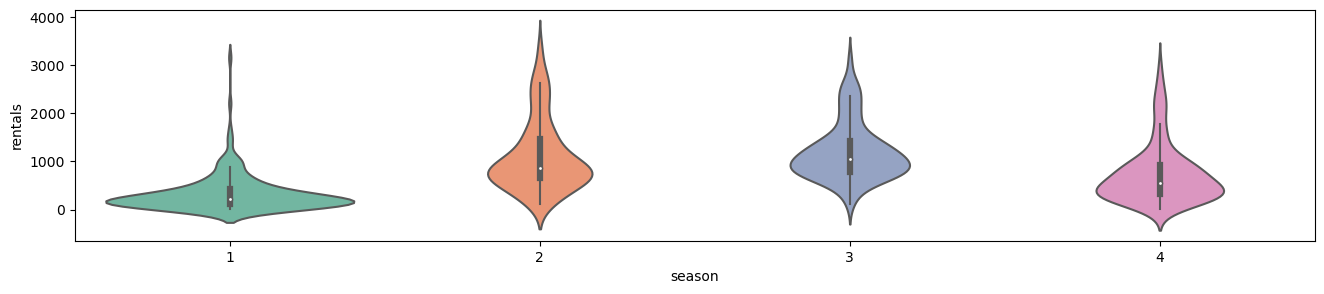

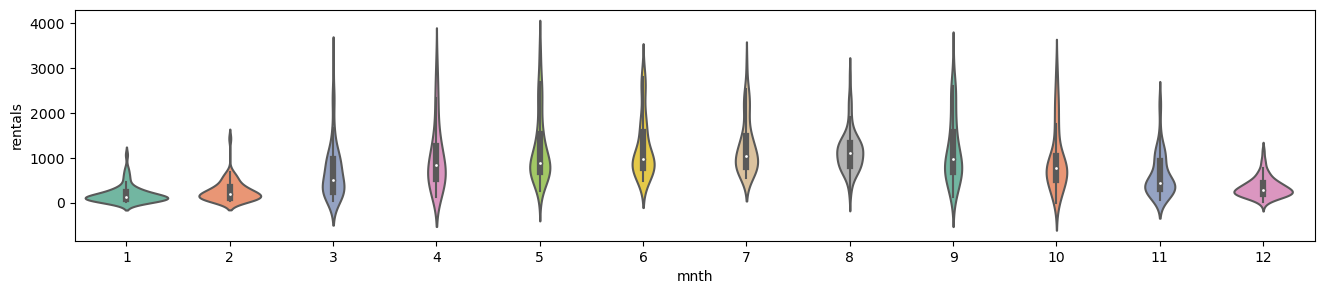

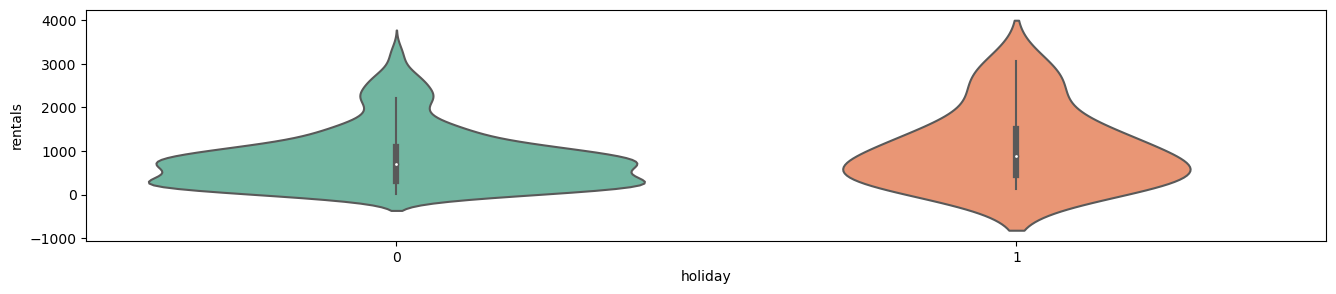

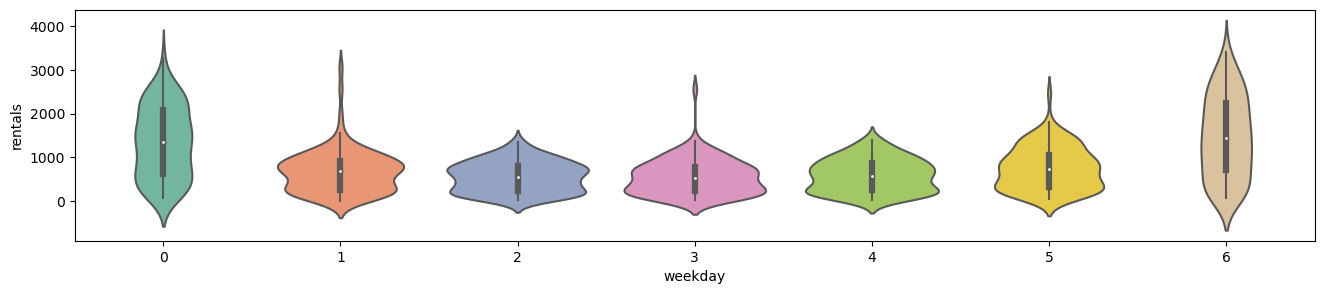

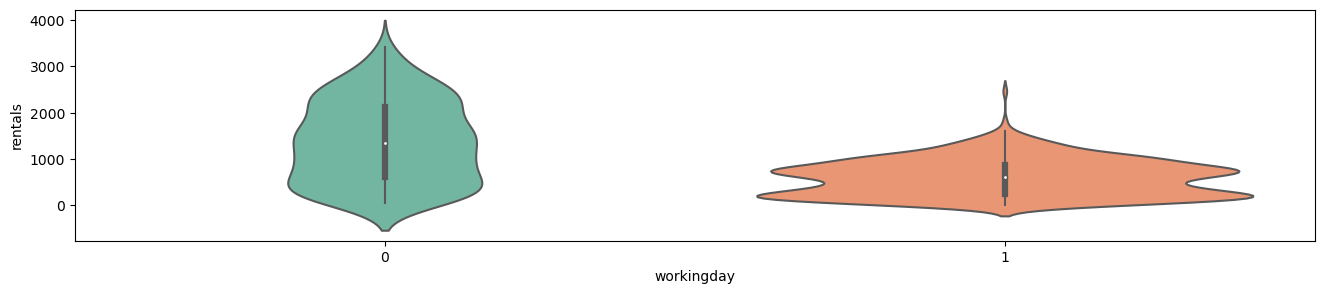

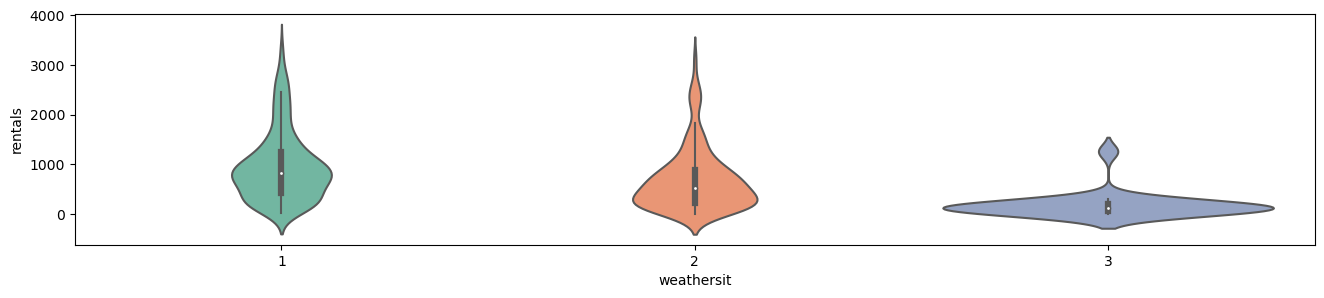

In [66]:
for categoric_features in categorical_features:
    plt.figure(figsize=(16, 3))
    sns.violinplot(y=bike_data[target], x=bike_data[categoric_features], palette="Set2")
    plt.show()

Widać, ze rowery zimą są mało popularne (prawdopodobnie wynalazek opon zimowych jeszcze do nas nie dotarł, mnie 
w tym roku zima nie zmusiła do zejścia z roweru :P, być moze ciepłe ubrania tez nie są popularne). Widać, ze wiekszosc rekordów
trzyma się dolnej części wykresu, co sureruje, ze peaki to jednak weekendy, a do pracy wciąz ludzie dojezdzaja samochodami.

Miesiace 1, 2, 6 - 8, 12 charakteryzują się najnzszymi peakami. O ile zima sama się tłumaczy, o tyle okres wakacyjny prawdopodobnie oznacza
mniejszy popyt przez inne aktywności bądź upały. Najwiekszą popularnością rowery cieszą sie pod koniec wiosny i na początku jesieni, czyli jednak lubimy cieło, 
lub są to momenty gdy ludzie mają więcej czasu wolnego (jak majówka np)

Okresy świąteczne charakteryzują się wzrostem zainteresowania, jednak nie jest to wzrost dramatycznie duzy.

Weekendy to zdecydowane zwiększenia zainteresowania, za to wtorek i czwartek sa najmniej popularnymi dniami na wypozyczanie roweru. W środy oserwujemy niewielki peak. W końcu to przeciez
powinien być dzień wolny od pracy!

Widać, ze praca wysysa z ludzi wszelką energię i w dni wolne nadmiarów muszą pozbywać się pedałując po okolicy.
Nasuwa to prosty wniosek: źle wybrali zawód. Smutni ludzie.

Jako ze pogodowy graf nie zawiera rekordów kataklizmów (a szkoda, to by było ciekawe porównanie), mozemy jedynie zauwazyć, ze ludzie są z cukru. Mgła i zachmurzenie natomiast zainteresowanie wypozyczeniem roweru zmniejsza jedynie w sposób marginalny.